In [1]:
!pip install gensim

In [2]:
!pip install spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 70.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [3]:
from sklearn.datasets import fetch_20newsgroups

In [4]:
newsgroups = fetch_20newsgroups(subset='all')

In [5]:
print(f"Number of documents: {len(newsgroups.data)}")
print(f"Number of categories: {len(newsgroups.target_names)}")
print(f"Categories: {newsgroups.target_names}")

Number of documents: 18846
Number of categories: 20
Categories: ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [6]:
# Example of accessing a document and its category
print(f"\nExample document:\n{newsgroups.data[0]}")
print(f"\nCategory: {newsgroups.target_names[newsgroups.target[0]]}")


Example document:
From: Mamatha Devineni Ratnam <mr47+@andrew.cmu.edu>
Subject: Pens fans reactions
Organization: Post Office, Carnegie Mellon, Pittsburgh, PA
Lines: 12
NNTP-Posting-Host: po4.andrew.cmu.edu



I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However, I am going to put an end
to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they
are killing those Devils worse than I thought. Jagr just showed you why
he is much better than his regular season stats. He is also a lot
fo fun to watch in the playoffs. Bowman should let JAgr have a lot of
fun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final
regular season game.          PENS RULE!!!



Category: rec.sport.hockey


In [7]:
import re
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [8]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [9]:
# Load spaCy's small English model
nlp = spacy.load('en_core_web_sm')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = re.sub(r'\W+', ' ', text)  # Remove special characters
    tokens = word_tokenize(text.lower())  # Tokenize and convert to lower case
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]  # Lemmatize and remove stop words
    return tokens

processed_docs = [preprocess(doc) for doc in newsgroups.data]

In [10]:
import gensim
from gensim.corpora.dictionary import Dictionary

In [11]:
# Create a dictionary and corpus
dictionary = Dictionary(processed_docs)
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

In [12]:
lda_model = gensim.models.LdaModel(corpus, num_topics=10, id2word=dictionary, passes=15)
topics = lda_model.print_topics(num_words=10)

# Display discovered topics
for idx, topic in topics:
    print(f"Topic {idx}: {topic}")

Topic 0: 0.012*"edu" + 0.008*"line" + 0.008*"subject" + 0.007*"organization" + 0.006*"com" + 0.006*"game" + 0.006*"writes" + 0.006*"ca" + 0.005*"car" + 0.005*"article"
Topic 1: 0.006*"armenian" + 0.006*"space" + 0.006*"israel" + 0.005*"jew" + 0.004*"israeli" + 0.004*"year" + 0.004*"war" + 0.003*"arab" + 0.003*"said" + 0.003*"u"
Topic 2: 0.055*"com" + 0.011*"writes" + 0.011*"q" + 0.010*"article" + 0.008*"att" + 0.008*"organization" + 0.008*"org" + 0.007*"stratus" + 0.007*"subject" + 0.007*"line"
Topic 3: 0.014*"edu" + 0.013*"line" + 0.012*"subject" + 0.012*"organization" + 0.009*"1" + 0.007*"com" + 0.006*"university" + 0.006*"system" + 0.006*"posting" + 0.006*"drive"
Topic 4: 0.055*"edu" + 0.015*"organization" + 0.015*"line" + 0.015*"subject" + 0.012*"writes" + 0.011*"university" + 0.010*"article" + 0.009*"posting" + 0.009*"nntp" + 0.009*"host"
Topic 5: 0.008*"edu" + 0.008*"would" + 0.008*"people" + 0.007*"one" + 0.006*"com" + 0.005*"writes" + 0.005*"think" + 0.005*"article" + 0.005*"li

In [13]:
!pip install pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 50.9 MB/s eta 0:00:00


In [14]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

In [15]:
# Visualize the topics
lda_display = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(lda_display)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
from gensim.models import Word2Vec

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
model = Word2Vec(processed_docs, vector_size=100, window=5, min_count=2, workers=4)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
document_embeddings = [sum([model.wv[word] for word in doc if word in model.wv]) / len(doc) for doc in processed_docs]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
from sklearn.metrics.pairwise import cosine_similarity

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
similarity_matrix = cosine_similarity(document_embeddings)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:
# Perform clustering
kmeans = KMeans(n_clusters=10)
clusters = kmeans.fit_predict(similarity_matrix)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


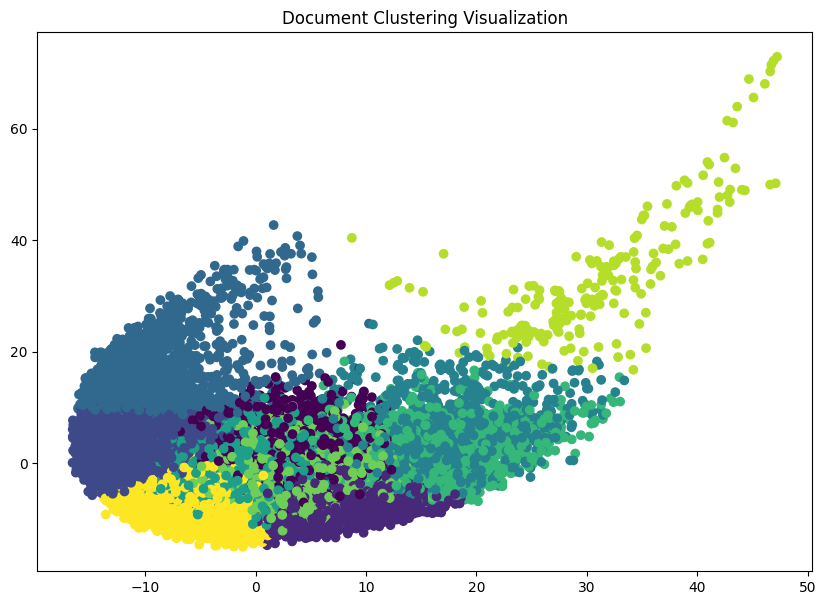

In [23]:
# Visualize using PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(similarity_matrix)

plt.figure(figsize=(10, 7))
plt.scatter(reduced_data[:,0], reduced_data[:,1], c=clusters)
plt.title('Document Clustering Visualization')
plt.show()